In [1]:
import re
import pandas as pd
import datetime as dt

In [2]:
SVG_path_string = "M 0 59.16999999999999 L 0.29456653412085 63.5925 L 0.5891330682417 62.43350000000001 L 0.88369960236256 62.89099999999999 L 1.7673992047251 64.53800000000001 L 2.061965738846 71.8885 L 2.3565322729668 67.86250000000001 L 2.6510988070877 60.45099999999999 L 2.9456653412085 60.45099999999999 L 3.8293649435711 60.45099999999999 L 4.1239314776919 64.5685 L 4.4184980118128 64.35499999999999 L 4.7130645459336 60.3595 L 5.0076310800545 59.74950000000001 L 5.891330682417 62.18950000000001 L 6.1858972165379 69.601 L 6.4804637506587 63.775499999999994 L 6.7750302847796 59.474999999999994 L 7.0695968189004 59.26150000000001 L 7.953296421263 59.26150000000001 L 8.2478629553838 56.42500000000001 L 8.5424294895047 61.823499999999996 L 8.8369960236256 67.1 L 9.1315625577464 67.1 L 10.015262160109 67.2525 L 10.30982869423 64.8125 L 10.604395228351 63.257000000000005 L 10.898961762472 63.86699999999999 L 11.193528296592 63.37899999999999 L 12.077227898955 62.58600000000001 L 12.371794433076 89.731 L 12.666360967197 92.049 L 12.960927501317 97.29499999999999 L 13.255494035438 95.953 L 14.139193637801 94.0315 L 14.433760171922 92.99449999999999 L 14.728326706043 83.631 L 15.022893240163 83.11250000000001 L 15.317459774284 86.1625 L 16.201159376647 86.77250000000001 L 16.495725910768 81.2825 L 16.790292444889 77.43950000000001 L 17.084858979009 76.70750000000001 L 17.37942551313 81.46549999999999 L 18.263125115493 77.01249999999999 L 18.557691649614 77.775 L 18.852258183735 69.7535 L 19.146824717855 70.821 L 19.441391251976 76.25 L 20.325090854339 78.38499999999999 L 20.61965738846 76.86000000000001 L 20.91422392258 80.7945 L 21.208790456701 82.655 L 21.503356990822 82.62450000000001 L 22.387056593185 85.36949999999999 L 22.681623127306 85.36949999999999 L 22.976189661426 81.74000000000001 L 23.270756195547 85.94900000000001 L 23.565322729668 78.8425 L 24.449022332031 79.30000000000001 L 24.743588866152 82.35 L 25.038155400272 83.75299999999999 L 25.332721934393 86.6505 L 25.627288468514 85.7355 L 26.510988070877 87.1385 L 26.805554604998 88.44999999999999 L 27.100121139118 85.85749999999999 L 27.394687673239 83.7225 L 27.68925420736 85.79650000000001 L 28.572953809723 91.439 L 28.867520343843 91.5 L 29.162086877964 94.001 L 29.456653412085 96.8375 L 29.751219946206 95.648 L 30.634919548569 97.905 L 30.929486082689 96.868 L 31.22405261681 95.5565 L 31.518619150931 96.25800000000001 L 31.813185685052 96.80699999999999 L 32.696885287415 99.97900000000001 L 32.991451821535 100.65 L 33.286018355656 102.2055 L 33.580584889777 104.31 L 33.875151423898 106.9025 L 34.758851026261 109.678 L 35.053417560381 109.22049999999999 L 35.347984094502 103.822 L 35.642550628623 108.18350000000001 L 35.937117162744 106.62799999999999 L 36.820816765106 107.66499999999999 L 37.115383299227 114.98500000000001 L 37.409949833348 116.1745 L 37.704516367469 111.66050000000001 L 37.99908290159 111.5995 L 38.882782503952 111.5995 L 39.177349038073 108.763 L 39.471915572194 108.73249999999999 L 39.766482106315 108.214 L 40.061048640436 106.689 L 40.944748242798 111.5385 L 41.239314776919 108.763 L 41.53388131104 109.5865 L 41.828447845161 107.97 L 42.123014379282 107.97 L 43.006713981644 101.77850000000001 L 43.301280515765 108.8545 L 43.595847049886 109.22049999999999 L 43.890413584007 109.61699999999999 L 44.184980118128 114.80199999999999 L 45.06867972049 116.7235 L 45.363246254611 112.423 L 45.657812788732 109.19 L 45.952379322853 108.82400000000001 L 46.246945856974 113.18549999999999 L 47.130645459336 112.88050000000001 L 47.425211993457 107.543 L 47.719778527578 97.9965 L 48.014345061699 95.3125 L 48.30891159582 95.404 L 49.192611198182 95.16 L 49.487177732303 97.38650000000001 L 49.781744266424 99.00299999999999 L 50.076310800545 98.66749999999999 L 50.370877334666 98.149 L 51.254576937028 102.90700000000001 L 51.549143471149 102.75450000000001 L 51.84371000527 102.47999999999999 L 52.138276539391 102.47999999999999 L 52.432843073512 104.7065 L 53.316542675874 105.225 L 53.611109209995 106.71950000000001 L 53.905675744116 100.80250000000001 L 54.200242278237 101.59549999999999 L 54.494808812358 101.74799999999999 L 55.37850841472 102.57149999999999 L 55.673074948841 103.88300000000001 L 55.967641482962 101.565 L 56.262208017083 88.44999999999999 L 56.556774551204 84.18 L 57.440474153566 83.936 L 57.735040687687 84.48500000000001 L 58.029607221808 84.78999999999999 L 58.324173755929 81.5875 L 58.618740290049 84.48500000000001 L 59.502439892412 86.803 L 59.797006426533 83.387 L 60.091572960654 73.9625 L 60.386139494775 74.84700000000001 L 60.680706028895 75.79249999999999 L 61.564405631258 79.63550000000001 L 61.858972165379 79.11699999999999 L 62.1535386995 81.7705 L 62.448105233621 82.35 L 62.742671767741 87.71799999999999 L 63.626371370104 87.87049999999999 L 63.920937904225 86.132 L 64.215504438346 87.22999999999999 L 64.510070972467 86.92500000000001 L 64.804637506587 85.7355 L 65.68833710895 78.69 L 65.982903643071 76.25 L 66.277470177192 74.02350000000001 L 66.572036711312 75.06049999999999 L 66.866603245433 76.8905 L 67.750302847796 80.0015 L 68.044869381917 78.5375 L 68.339435916038 74.725 L 68.634002450158 79.45249999999999 L 68.928568984279 81.25200000000001 L 69.812268586642 81.89250000000001 L 70.106835120763 82.22800000000001 L 70.401401654884 85.1865 L 70.695968189004 84.39349999999999 L 70.990534723125 84.63749999999999 L 71.874234325488 89.76150000000001 L 72.168800859609 89.2125 L 72.46336739373 92.964 L 72.75793392785 93.72649999999999 L 73.052500461971 87.108 L 73.936200064334 88.328 L 74.230766598455 90.4325 L 74.525333132575 88.999 L 74.819899666696 89.36500000000001 L 75.114466200817 91.31700000000001 L 75.99816580318 90.34100000000001 L 76.292732337301 89.09049999999999 L 76.587298871421 89.09049999999999 L 76.881865405542 88.20599999999999 L 77.176431939663 86.92500000000001 L 78.060131542026 93.33000000000001 L 78.354698076147 93.90950000000001 L 78.649264610267 90.707 L 78.943831144388 90.15799999999999 L 79.238397678509 90.15799999999999 L 80.122097280872 88.78550000000001 L 80.416663814993 92.26249999999999 L 80.711230349113 92.72 L 81.005796883234 90.707 L 81.300363417355 90.707 L 82.184063019718 95.0075 L 82.478629553838 99.79599999999999 L 82.773196087959 97.173 L 83.06776262208 96.929 L 83.362329156201 91.5 L 84.246028758564 91.1035 L 84.540595292684 90.88999999999999 L 84.835161826805 90.24950000000001 L 85.129728360926 91.53049999999999 L 85.424294895047 91.95750000000001 L 86.30799449741 86.34549999999999 L 86.60256103153 80.7945 L 86.897127565651 83.26499999999999 L 87.191694099772 85.36949999999999 L 87.486260633893 84.7595 L 88.369960236256 81.3435 L 88.664526770376 79.30000000000001 L 88.959093304497 76.1585 L 89.253659838618 79.14750000000001 L 89.548226372739 80.97749999999999 L 90.431925975101 81.49600000000001 L 90.726492509222 80.76400000000001 L 91.021059043343 81.13 L 91.315625577464 76.189 L 91.610192111585 70.577 L 92.493891713947 72.80350000000001 L 92.788458248068 71.37 L 93.083024782189 72.65100000000001 L 93.37759131631 77.6225 L 93.672157850431 76.006 L 94.555857452793 71.2175 L 94.850423986914 73.87100000000001 L 95.144990521035 78.0495 L 95.439557055156 77.89699999999999 L 95.734123589277 79.7575 L 96.617823191639 80.33699999999999 L 96.91238972576 85.21700000000001 L 97.206956259881 81.0385 L 97.501522794002 85.1865 L 97.796089328123 86.4065 L 98.679788930485 84.88149999999999 L 98.974355464606 87.47399999999999 L 99.268921998727 91.13399999999999 L 99.563488532848 87.3825 L 99.858055066969 87.9925 L 100.74175466933 84.78999999999999 L 101.03632120345 86.132 L 101.33088773757 86.58949999999999 L 101.62545427169 88.84649999999999 L 101.92002080581 86.315 L 102.80372040818 82.7465 L 103.0982869423 78.41550000000001 L 103.39285347642 73.505 L 103.68742001054 74.51150000000001 L 103.98198654466 80.03200000000001 L 104.86568614702 80.03200000000001 L 105.16025268114 81.25200000000001 L 105.45481921526 81.0385 L 105.74938574939 78.934 L 106.04395228351 77.34800000000001 L 106.92765188587 76.12799999999999 L 107.22221841999 72.46799999999999 L 107.51678495411 80.0625 L 107.81135148823 79.69649999999999 L 108.10591802235 79.69649999999999 L 108.98961762472 79.69649999999999 L 109.28418415884 77.98849999999999 L 109.57875069296 77.3785 L 109.87331722708 78.38499999999999 L 110.1678837612 77.34800000000001 L 111.05158336356 72.07149999999999 L 111.34614989768 73.993 L 111.6407164318 73.87100000000001 L 111.93528296592 76.46350000000001 L 112.22984950004 75.4265 L 113.11354910241 77.19550000000001 L 113.40811563653 79.36099999999999 L 113.70268217065 78.08000000000001 L 113.99724870477 77.287 L 114.29181523889 74.9385 L 115.17551484125 70.4855 L 115.47008137537 70.4855 L 115.76464790949 73.44399999999999 L 116.05921444362 77.5615 L 116.35378097774 78.96449999999999 L 117.2374805801 79.2695 L 117.53204711422 80.82499999999999 L 117.82661364834 78.3545 L 118.12118018246 74.542 L 118.41574671658 73.261 L 119.29944631894 73.078 L 119.59401285307 75.762 L 119.88857938719 77.47 L 120.18314592131 75.79249999999999 L 120.47771245543 74.32849999999999 L 121.36141205779 70.089 L 121.65597859191 70.60749999999999 L 121.95054512603 69.96700000000001 L 122.24511166015 69.38749999999999 L 122.53967819427 68.74700000000001 L 123.42337779664 72.16300000000001 L 123.71794433076 69.81450000000001 L 124.01251086488 69.2655 L 124.307077399 72.86449999999999 L 124.60164393312 66.124 L 125.48534353548 66.64250000000001 L 125.7799100696 67.22200000000001 L 126.07447660372 68.16749999999999 L 126.36904313785 71.33949999999999 L 126.66360967197 71.614 L 127.54730927433 74.6335 L 127.84187580845 74.725 L 128.13644234257 72.1325 L 128.43100887669 73.2305 L 128.72557541081 75.06049999999999 L 129.60927501317 75.06049999999999 L 129.9038415473 76.52449999999999 L 130.19840808142 76.52449999999999 L 130.49297461554 79.78800000000001 L 130.78754114966 84.424 L 131.67124075202 84.4545 L 131.96580728614 87.291 L 132.26037382026 88.11449999999999 L 132.55494035438 86.559 L 132.8495068885 87.22999999999999 L 133.73320649087 89.9445 L 134.02777302499 83.875 L 134.32233955911 83.11250000000001 L 134.61690609323 84.9425 L 134.91147262735 85.76599999999999 L 135.79517222971 86.132 L 136.08973876383 84.668 L 136.38430529795 83.20400000000001 L 136.67887183208 83.11250000000001 L 136.9734383662 83.35650000000001 L 137.85713796856 83.57 L 138.15170450268 87.4435 L 138.4462710368 85.095 L 138.74083757092 86.62 L 139.03540410504 86.77250000000001 L 139.9191037074 88.44999999999999 L 140.21367024153 90.55449999999999 L 140.50823677565 89.548 L 140.80280330977 88.2365 L 141.09736984389 87.3825 L 141.98106944625 89.36500000000001 L 142.27563598037 91.012 L 142.57020251449 88.93799999999999 L 142.86476904861 86.49799999999999 L 143.15933558273 84.82050000000001 L 144.0430351851 83.875 L 144.33760171922 85.4915 L 144.63216825334 90.4325 L 144.92673478746 86.62 L 145.22130132158 85.095 L 146.10500092394 85.095 L 146.39956745806 84.9425 L 146.69413399218 80.3675 L 146.9887005263 73.44399999999999 L 147.28326706043 71.4615 L 148.16696666279 71.7055 L 148.46153319691 68.625 L 148.75609973103 70.089 L 149.05066626515 70.05850000000001 L 149.34523279927 70.6685 L 150.22893240163 68.625 L 150.52349893576 65.88 L 150.81806546988 68.01499999999999 L 151.112632004 68.80799999999999 L 151.40719853812 66.64250000000001 L 152.29089814048 64.53800000000001 L 152.5854646746 64.62950000000001 L 152.88003120872 64.66 L 153.17459774284 63.8365 L 153.46916427696 65.392 L 154.35286387933 70.79050000000001 L 154.64743041345 72.71199999999999 L 154.94199694757 73.505 L 155.23656348169 72.71199999999999 L 155.53113001581 74.6335 L 156.41482961817 73.261 L 156.70939615229 75.88399999999999 L 157.00396268641 76.37200000000001 L 157.29852922053 77.47 L 157.59309575466 74.60300000000001 L 158.47679535702 76.86000000000001 L 158.77136189114 73.4135 L 159.06592842526 72.31549999999999 L 159.36049495938 66.0935 L 159.6550614935 66.0935 L 160.53876109586 72.25450000000001 L 160.83332762999 75.1825 L 161.12789416411 72.529 L 161.42246069823 70.15 L 161.71702723235 69.32650000000001 L 162.60072683471 65.66650000000001 L 162.89529336883 60.024 L 163.18985990295 60.024 L 163.48442643707 64.172 L 163.77899297119 66.55099999999999 L 164.66269257356 65.392 L 164.95725910768 66.73400000000001 L 165.2518256418 67.405 L 165.54639217592 66.70349999999999 L 165.84095871004 66.21549999999999 L 166.7246583124 66.55099999999999 L 167.01922484652 62.799499999999995 L 167.31379138064 59.292 L 167.60835791476 59.444500000000005 L 167.90292444889 65.75800000000001 L 168.78662405125 66.55099999999999 L 169.08119058537 64.53800000000001 L 169.37575711949 63.013000000000005 L 169.67032365361 61.94550000000001 L 169.96489018773 61.91499999999999 L 170.84858979009 61.91499999999999 L 171.14315632421 57.6755 L 171.43772285834 57.1875 L 171.73228939246 55.9675 L 172.02685592658 57.6755 L 172.91055552894 64.11099999999999 L 173.20512206306 65.1175 L 173.49968859718 64.3245 L 173.7942551313 65.392 L 174.08882166542 66.39850000000001 L 174.97252126779 65.81899999999999 L 175.26708780191 67.46600000000001 L 175.56165433603 70.2415 L 175.85622087015 72.4375 L 176.15078740427 74.51150000000001 L 177.03448700663 73.9625 L 177.32905354075 74.60300000000001 L 177.62362007487 78.507 L 177.91818660899 77.25649999999999 L 178.21275314312 82.0145 L 179.09645274548 78.1105 L 179.3910192796 81.8315 L 179.68558581372 82.2585 L 179.98015234784 79.63550000000001 L 180.27471888196 81.64850000000001 L 181.15841848432 83.75299999999999 L 181.45298501844 81.13 L 181.74755155257 81.2825 L 182.04211808669 81.25200000000001 L 182.33668462081 82.5025 L 183.22038422317 82.0755 L 183.51495075729 82.22800000000001 L 183.80951729141 82.77699999999999 L 184.10408382553 82.77699999999999 L 184.39865035965 86.49799999999999 L 185.28234996202 86.559 L 185.57691649614 87.1385 L 185.87148303026 87.01650000000001 L 186.16604956438 85.94900000000001 L 186.4606160985 85.03399999999999 L 187.34431570086 85.03399999999999 L 187.63888223498 84.88149999999999 L 187.9334487691 84.39349999999999 L 188.22801530322 82.38050000000001 L 188.52258183735 83.9665 L 189.40628143971 85.55250000000001 L 189.70084797383 82.838 L 189.99541450795 82.22800000000001 L 190.28998104207 81.49600000000001 L 190.58454757619 82.47200000000001 L 191.46824717855 81.46549999999999 L 191.76281371267 81.95349999999999 L 192.0573802468 81.06899999999999 L 192.35194678092 81.06899999999999 L 192.64651331504 81.06899999999999 L 193.5302129174 77.226 L 193.82477945152 79.2695 L 194.11934598564 79.54400000000001 L 194.41391251976 82.35 L 194.70847905388 81.00800000000001 L 195.59217865625 85.76599999999999 L 195.88674519037 90.88999999999999 L 196.18131172449 86.864 L 196.47587825861 86.10149999999999 L 196.77044479273 85.827 L 197.65414439509 88.44999999999999 L 197.94871092921 90.6155 L 198.24327746333 91.95750000000001 L 198.53784399745 91.53049999999999 L 198.83241053157 94.2755 L 199.71611013394 95.3125 L 200.01067666806 94.5805 L 200.30524320218 95.0075 L 200.5998097363 94.55000000000001 L 200.89437627042 94.55000000000001 L 201.77807587278 95.16 L 202.0726424069 91.8965 L 202.36720894103 91.71350000000001 L 202.66177547515 91.5 L 202.95634200927 91.68299999999999 L 203.84004161163 92.72 L 204.13460814575 93.6045 L 204.42917467987 94.45849999999999 L 204.72374121399 100.833 L 205.01830774811 102.358 L 205.90200735048 103.69999999999999 L 206.1965738846 104.4015 L 206.49114041872 107.3295 L 206.78570695284 102.47999999999999 L 207.08027348696 102.17500000000001 L 207.96397308932 108.39699999999999 L 208.25853962344 107.3295 L 208.55310615756 105.225 L 208.84767269168 102.541 L 209.1422392258 104.4625 L 210.02593882817 101.138 L 210.32050536229 102.96799999999999 L 210.61507189641 100.833 L 210.90963843053 100.22300000000001 L 211.20420496465 99.7655 L 212.08790456701 99.7655 L 212.38247110113 96.80699999999999 L 212.67703763525 100.37549999999999 L 212.97160416938 94.55000000000001 L 213.2661707035 87.596 L 214.14987030586 81.5265 L 214.44443683998 78.62899999999999 L 214.7390033741 82.77699999999999 L 215.03356990822 80.03200000000001 L 215.32813644234 79.971 L 216.21183604471 83.387 L 216.50640257883 89.06 L 216.80096911295 79.5135 L 217.09553564707 69.906 L 217.39010218119 70.821 L 218.27380178355 69.5095 L 218.56836831767 68.19800000000001 L 218.86293485179 67.344 L 219.15750138591 68.35050000000001 L 219.45206792003 68.35050000000001 L 220.3357675224 68.35050000000001 L 220.63033405652 69.7535 L 220.92490059064 69.23500000000001 L 221.21946712476 68.32 L 221.51403365888 61.579499999999996 L 222.39773326124 61.70150000000001 L 222.69229979536 61.85400000000001 L 222.98686632948 61.85400000000001 L 223.28143286361 64.233 L 223.57599939773 68.41149999999999 L 224.45969900009 68.41149999999999 L 224.75426553421 68.01499999999999 L 225.04883206833 71.09549999999999 L 225.34339860245 69.845 L 225.63796513657 73.93199999999999 L 226.52166473893 76.43299999999999 L 226.81623127306 77.19550000000001 L 227.11079780718 79.7575 L 227.4053643413 73.505 L 227.69993087542 69.0215 L 228.58363047778 67.832 L 228.8781970119 65.57499999999999 L 229.17276354602 71.858 L 229.46733008014 76.03649999999999 L 229.76189661426 78.62899999999999 L 230.64559621663 79.7575 L 230.94016275075 84.82050000000001 L 231.23472928487 83.35650000000001 L 231.52929581899 80.33699999999999 L 231.82386235311 77.34800000000001 L 232.70756195547 78.56800000000001 L 233.00212848959 76.21950000000001 L 233.29669502371 81.862 L 233.59126155784 84.33250000000001 L 233.88582809196 82.2585 L 234.76952769432 81.46549999999999 L 235.06409422844 81.89250000000001 L 235.35866076256 80.82499999999999 L 235.65322729668 79.30000000000001 L 235.9477938308 79.239 L 236.83149343316 79.30000000000001 L 237.12605996729 76.86000000000001 L 237.42062650141 73.93199999999999 L 237.71519303553 73.93199999999999 L 238.00975956965 76.25 L 238.89345917201 74.542 L 239.18802570613 68.80799999999999 L 239.48259224025 71.18700000000001 L 239.77715877437 70.638 L 240.07172530849 66.0935 L 240.95542491086 61.27449999999999 L 241.24999144498 62.281000000000006 L 241.5445579791 67.9845 L 241.83912451322 72.55950000000001 L 242.13369104734 73.62700000000001 L 243.0173906497 68.564 L 243.31195718382 70.94300000000001 L 243.60652371794 69.0215 L 243.90109025207 71.03450000000001 L 244.19565678619 69.6925 L 245.07935638855 68.01499999999999 L 245.37392292267 68.93 L 245.66848945679 71.9495 L 245.96305599091 76.3415 L 246.25762252503 73.2305 L 247.14132212739 70.75999999999999 L 247.43588866152 73.44399999999999 L 247.73045519564 75.48750000000001 L 248.02502172976 72.1325 L 248.31958826388 68.89949999999999 L 249.20328786624 70.54650000000001 L 249.49785440036 64.965 L 249.79242093448 69.174 L 250.0869874686 74.26750000000001 L 250.38155400272 75.88399999999999 L 251.26525360509 74.51150000000001 L 251.55982013921 77.47 L 251.85438667333 77.92750000000001 L 252.14895320745 75.06049999999999 L 252.44351974157 71.9495 L 253.32721934393 70.882 L 253.62178587805 70.882 L 253.91635241217 66.917 L 254.2109189463 63.8365 L 254.50548548042 60.05449999999999 L 255.38918508278 59.3835 L 255.6837516169 56.547 L 255.97831815102 50.02000000000001 L 256.27288468514 51.575500000000005 L 256.56745121926 57.035 L 257.45115082162 54.2595 L 257.74571735575 54.900000000000006 L 258.04028388987 54.32050000000001 L 258.33485042399 54.56450000000001 L 258.62941695811 52.4905 L 259.51311656047 51.849999999999994 L 259.80768309459 54.32050000000001 L 260.10224962871 55.4795 L 260.39681616283 57.584 L 260.69138269695 58.712500000000006 L 261.57508229932 58.13300000000001 L 261.86964883344 58.34649999999999 L 262.16421536756 60.78649999999999 L 262.45878190168 58.712500000000006 L 262.7533484358 60.69499999999999 L 263.63704803816 60.14599999999999 L 263.93161457228 63.86699999999999 L 264.2261811064 62.67750000000001 L 264.52074764052 64.78200000000001 L 264.81531417465 69.9975 L 265.69901377701 68.5335 L 265.99358031113 72.1325 L 266.28814684525 70.45500000000001 L 266.58271337937 71.03450000000001 L 266.87727991349 74.11500000000001 L 267.76097951585 73.19999999999999 L 268.05554604998 69.38749999999999 L 268.3501125841 69.47900000000001 L 268.64467911822 74.26750000000001 L 268.93924565234 74.786 L 269.8229452547 63.13499999999999 L 270.11751178882 54.47300000000001 L 270.41207832294 58.1635 L 270.70664485706 56.120000000000005 L 271.00121139118 56.791 L 271.88491099355 51.911 L 272.17947752767 54.32050000000001 L 272.47404406179 54.38149999999999 L 272.76861059591 51.24000000000001 L 273.06317713003 51.7585 L 273.94687673239 47.1225 L 274.24144326651 65.453 L 274.53600980063 71.614 L 274.83057633475 73.19999999999999 L 275.12514286888 74.6335 L 276.00884247124 70.54650000000001 L 276.30340900536 62.18950000000001 L 276.59797553948 63.65350000000001 L 276.8925420736 58.1635 L 277.18710860772 59.6275 L 278.07080821008 63.928 L 278.3653747442 62.22 L 278.65994127833 57.9195 L 278.95450781245 61.21350000000001 L 279.24907434657 65.697 L 280.13277394893 61.6405 L 280.42734048305 62.708 L 280.72190701717 62.43350000000001 L 281.01647355129 59.932500000000005 L 281.31104008541 61.488 L 282.19473968778 58.59049999999999 L 282.4893062219 58.13300000000001 L 282.78387275602 62.00649999999999 L 283.07843929014 62.6165 L 283.37300582426 60.69499999999999 L 284.25670542662 57.00450000000001 L 284.55127196074 58.56 L 284.84583849486 55.50999999999999 L 285.14040502898 55.11349999999999 L 285.43497156311 51.94149999999999 L 286.31867116547 53.039500000000004 L 286.61323769959 54.77799999999999 L 286.90780423371 54.198499999999996 L 287.20237076783 66.94749999999999 L 287.49693730195 66.21549999999999 L 288.38063690431 60.756 L 288.67520343843 58.77350000000001 L 288.96976997256 52.85650000000001 L 289.26433650668 49.37950000000001 L 289.5589030408 54.77799999999999 L 290.44260264316 58.986999999999995 L 290.73716917728 59.8715 L 291.0317357114 61.335499999999996 L 291.32630224552 67.95400000000001 L 291.62086877964 67.95400000000001 L 292.50456838201 68.65549999999999 L 292.79913491613 65.81899999999999 L 293.09370145025 65.48349999999999 L 293.38826798437 67.43549999999999 L 293.68283451849 64.172 L 294.56653412085 64.172 L 294.86110065497 64.172 L 295.15566718909 67.22200000000001 L 295.45023372321 70.30250000000001 L 295.74480025734 70.79050000000001 L 296.6284998597 70.79050000000001 L 296.92306639382 66.70349999999999 L 297.21763292794 66.30699999999999 L 297.51219946206 62.89099999999999 L 297.80676599618 62.952 L 298.69046559854 60.23750000000001 L 298.98503213266 57.035 L 299.27959866679 55.20500000000001 L 299.57416520091 56.2115 L 299.86873173503 60.024 L 300.75243133739 60.08500000000001 L 301.04699787151 62.037000000000006 L 301.34156440563 57.88900000000001 L 301.63613093975 53.34450000000001 L 301.93069747387 56.150499999999994 L 302.81439707624 54.412000000000006 L 303.10896361036 54.595 L 303.40353014448 57.12649999999999 L 303.6980966786 61.30500000000001 L 303.99266321272 67.3135 L 304.87636281508 68.564 L 305.1709293492 73.81 L 305.46549588332 76.37200000000001 L 305.76006241744 84.119 L 306.05462895156 84.82050000000001 L 306.93832855393 86.071 L 307.23289508805 84.668 L 307.52746162217 98.21000000000001 L 307.82202815629 99.857 L 308.11659469041 98.2405 L 309.00029429277 99.2165 L 309.29486082689 95.28200000000001 L 309.58942736102 98.881 L 309.88399389514 101.565 L 310.17856042926 102.57149999999999 L 311.06226003162 100.07050000000001 L 311.35682656574 100.71100000000001 L 311.65139309986 101.10749999999999 L 311.94595963398 100.9855 L 312.2405261681 104.82849999999999 L 313.12422577047 102.846 L 313.41879230459 104.09649999999999 L 313.71335883871 102.32749999999999 L 314.00792537283 103.09 L 314.30249190695 103.88300000000001 L 315.18619150931 106.38399999999999 L 315.48075804343 109.31200000000001 L 315.77532457755 110.68450000000001 L 316.06989111167 113.85650000000001 L 316.36445764579 117.1505 L 317.24815724816 117.3335 L 317.54272378228 117.181 L 317.8372903164 121.39 L 318.13185685052 126.026 L 318.42642338464 124.1045 L 319.310122987 124.6535 L 319.60468952112 124.6535 L 319.89925605524 126.27 L 320.19382258937 119.8345 L 320.48838912349 121.451 L 321.37208872585 119.438 L 321.66665525997 116.266 L 321.96122179409 114.436 L 322.25578832821 114.863 L 322.55035486233 115.07650000000001 L 323.4340544647 114.375 L 323.72862099882 114.07 L 324.02318753294 114.7715 L 324.31775406706 113.42949999999999 L 324.61232060118 113.42949999999999 L 325.49602020354 113.42949999999999 L 325.79058673766 111.1115 L 326.08515327178 109.739 L 326.3797198059 109.8305 L 326.67428634002 109.80000000000001 L 327.55798594239 111.23349999999999 L 327.85255247651 111.99600000000001 L 328.14711901063 112.05699999999999 L 328.44168554475 110.471 L 328.73625207887 112.8195 L 329.61995168123 111.96549999999999 L 329.91451821535 111.75200000000001 L 330.20908474947 111.935 L 330.5036512836 111.935 L 330.79821781772 111.56899999999999 L 331.68191742008 111.56899999999999 L 331.9764839542 117.8825 L 332.27105048832 118.462 L 332.56561702244 129.9605 L 332.86018355656 128.161 L 333.74388315892 129.686 L 334.03844969305 135.237 L 334.33301622717 133.3155 L 334.62758276129 136.9755 L 334.92214929541 133.6205 L 335.80584889777 136.945 L 336.10041543189 138.68349999999998 L 336.39498196601 143.1365 L 336.68954850013 143.95999999999998 L 336.98411503425 142.801 L 337.86781463662 142.5875 L 338.16238117074 144.4785 L 338.45694770486 142.40449999999998 L 338.75151423898 141.0015 L 339.0460807731 142.3435 L 339.92978037546 138.3175 L 340.22434690958 144.1125 L 340.5189134437 147.5285 L 340.81347997783 148.6875 L 341.10804651195 145.7595 L 341.99174611431 141.3675 L 342.28631264843 136.33499999999998 L 342.58087918255 129.9605 L 342.87544571667 124.4095 L 343.17001225079 127.185 L 344.05371185315 131.15 L 344.34827838728 122.1525 L 344.6428449214 123.83 L 344.93741145552 124.1045 L 345.23197798964 124.1045 L 346.115677592 125.6295 L 346.41024412612 125.294 L 346.70481066024 125.355 L 346.99937719436 124.196 L 347.29394372848 126.9715 L 348.17764333085 126.026 L 348.47220986497 127.917 L 348.76677639909 129.8385 L 349.06134293321 128.161 L 349.35590946733 125.416 L 350.23960906969 126.6665 L 350.53417560381 122.366 L 350.82874213793 124.196 L 351.12330867206 127.1545 L 351.41787520618 127.185 L 352.30157480854 127.1545 L 352.59614134266 120.9325 L 352.89070787678 118.95 L 353.1852744109 119.9565 L 353.47984094502 122.61 L 354.36354054738 126.758 L 354.65810708151 127.368 L 354.95267361563 136.9145 L 355.24724014975 136.762 L 355.54180668387 127.8865 L 356.42550628623 126.575 L 356.72007282035 126.1785 L 357.01463935447 130.4485 L 357.30920588859 129.503 L 357.60377242271 127.3375 L 358.48747202508 126.6055 L 358.7820385592 129.93 L 359.07660509332 135.725 L 359.37117162744 135.75549999999998 L 359.66573816156 137.311 L 360.54943776392 137.3415 L 360.84400429804 137.982 L 361.13857083216 137.982 L 361.43313736628 135.8775 L 361.72770390041 136.6095 L 362.61140350277 137.61599999999999 L 362.90597003689 137.1585 L 363.20053657101 139.812 L 363.49510310513 141.8555 L 363.78966963925 143.6245 L 364.67336924161 142.49599999999998 L 364.96793577574 144.936 L 365.26250230986 141.8555 L 365.55706884398 139.8425 L 365.8516353781 136.03 L 366.73533498046 136.39600000000002 L 367.02990151458 139.0495 L 367.3244680487 134.749 L 367.61903458282 137.70749999999998 L 367.91360111694 136.24349999999998 L 368.79730071931 132.6445 L 369.09186725343 137.4025 L 369.38643378755 144.57 L 369.68100032167 145.058 L 369.97556685579 138.65300000000002 L 370.85926645815 137.67700000000002 L 371.15383299227 140.3 L 371.44839952639 141.09300000000002 L 371.74296606051 138.3785 L 372.03753259464 142.252 L 372.921232197 141.6115 L 373.21579873112 142.13 L 373.51036526524 139.3545 L 373.80493179936 142.5875 L 374.09949833348 144.143 L 374.98319793584 144.143 L 375.27776446997 141.0625 L 375.57233100409 140.05599999999998 L 375.86689753821 133.4985 L 376.16146407233 131.15 L 377.04516367469 148.0165 L 377.33973020881 150.3345 L 377.63429674293 151.49349999999998 L 377.92886327705 148.84 L 378.22342981117 150.18200000000002 L 379.10712941354 152.805 L 379.40169594766 145.79000000000002 L 379.69626248178 144.84449999999998 L 379.9908290159 143.38049999999998 L 380.28539555002 148.779 L 381.16909515238 149.4805 L 381.4636616865 153.598 L 381.75822822062 164.85250000000002 L 382.05279475474 167.75 L 382.34736128887 167.8415 L 383.23106089123 161.772 L 383.52562742535 164.212 L 383.82019395947 165.43200000000002 L 384.11476049359 164.09 L 384.40932702771 168.36 L 385.29302663007 169.4275 L 385.58759316419 167.75 L 385.88215969832 169.946 L 386.17672623244 167.9025 L 386.47129276656 169.1225 L 387.35499236892 167.75 L 387.64955890304 167.018 L 387.94412543716 166.164 L 388.23869197128 166.89600000000002 L 388.5332585054 168.1465 L 389.41695810777 165.2185 L 389.71152464189 165.4625 L 390.00609117601 165.6455 L 390.30065771013 169.67149999999998 L 390.59522424425 170.8 L 391.47892384661 168.97 L 391.77349038073 166.591 L 392.06805691485 167.689 L 392.36262344897 164.94400000000002 L 392.6571899831 166.713 L 393.54088958546 167.994 L 393.83545611958 168.848 L 394.1300226537 170.983 L 394.42458918782 171.41 L 394.71915572194 174.7345 L 395.6028553243 171.10500000000002 L 395.89742185842 169.9765 L 396.19198839255 170.8 L 396.48655492667 172.386 L 396.78112146079 175.68 L 397.66482106315 175.985 L 397.95938759727 179.0045 L 398.25395413139 181.048 L 398.54852066551 179.95 L 398.84308719963 179.95 L 399.726786802 182.085 L 400.02135333612 178.4555 L 400.31591987024 177.84550000000002 L 400.61048640436 177.5405 L 400.90505293848 176.9 L 401.78875254084 176.9 L 402.08331907496 176.9 L 402.37788560908 173.0875 L 402.6724521432 173.05700000000002 L 402.96701867733 173.0265 L 403.85071827969 173.0265 L 404.14528481381 172.96550000000002 L 404.43985134793 174.277 L 404.73441788205 176.29000000000002 L 405.02898441617 176.29000000000002 L 405.91268401853 174.765 L 406.20725055265 175.558 L 406.50181708678 177.327 L 406.7963836209 179.21800000000002 L 407.09095015502 179.7975 L 407.97464975738 177.9065 L 408.2692162915 175.5885 L 408.56378282562 175.80200000000002 L 408.85834935974 176.5645 L 409.15291589386 175.74099999999999 L 410.03661549623 172.8435 L 410.33118203035 172.691 L 410.62574856447 171.7455 L 410.92031509859 169.0615 L 411.21488163271 171.10500000000002 L 412.09858123507 172.96550000000002 L 412.39314776919 171.959 L 412.68771430331 172.63 L 412.98228083743 173.179 L 413.27684737155 171.5015 L 414.16054697392 170.0375 L 414.45511350804 168.543 L 414.74968004216 165.85899999999998 L 415.04424657628 166.53 L 415.3388131104 164.4255 L 416.22251271276 164.5475 L 416.51707924688 165.4625 L 416.81164578101 166.53 L 417.10621231513 165.0355 L 417.40077884925 161.13150000000002 L 418.28447845161 161.61950000000002 L 418.57904498573 162.565 L 418.87361151985 165.1575 L 419.16817805397 177.78449999999998 L 419.46274458809 173.0875 L 420.34644419046 174.1855 L 420.64101072458 177.20499999999998 L 420.9355772587 181.1395 L 421.23014379282 182.268 L 421.52471032694 183.305 L 422.4084099293 183.1525 L 422.70297646342 184.6165 L 422.99754299754 185.5925 L 423.29210953166 187.27 L 423.58667606578 188.79500000000002 L 424.47037566815 191.0215 L 424.76494220227 192.15 L 425.05950873639 190.442 L 425.35407527051 190.0455 L 425.64864180463 192.9125 L 426.53234140699 191.235 L 426.82690794111 190.32 L 427.12147447523 185.44 L 427.41604100936 185.44 L 427.71060754348 187.636 L 428.59430714584 186.84300000000002 L 428.88887367996 187.4835 L 429.18344021408 187.575 L 429.4780067482 187.026 L 429.77257328232 187.026 L 430.65627288469 187.026 L 430.95083941881 185.8975 L 431.24540595293 186.965 L 431.53997248705 185.4095 L 431.83453902117 186.0195 L 432.71823862353 183 L 433.01280515765 184.6775 L 433.30737169177 183.9455 L 433.60193822589 185.2875 L 433.89650476001 186.0195 L 434.78020436238 186.05 L 435.0747708965 186.0195 L 435.36933743062 186.416 L 435.66390396474 185.4095 L 435.95847049886 185.135 L 436.84217010122 184.5555 L 437.13673663534 185.47050000000002 L 437.43130316946 185.8975 L 437.72586970359 185.8365 L 438.02043623771 184.2505 L 438.90413584007 182.39 L 439.19870237419 182.512 L 439.49326890831 182.512 L 439.78783544243 182.695 L 440.08240197655 182.1765 L 440.96610157891 181.902 L 441.26066811304 181.78 L 441.55523464716 179.15699999999998 L 441.84980118128 181.3225 L 442.1443677154 180.865 L 443.02806731776 183.305 L 443.32263385188 183.305 L 443.617200386 183.976 L 443.91176692012 182.7865 L 444.20633345424 183.1525 L 445.09003305661 181.536 L 445.38459959073 179.462 L 445.67916612485 176.595 L 445.97373265897 171.349 L 446.26829919309 170.8 L 447.15199879545 165.981 L 447.44656532957 165.31 L 447.74113186369 165.31 L 448.03569839782 169.397 L 448.33026493194 168.238 L 449.2139645343 167.75 L 449.50853106842 168.238 L 449.80309760254 168.17700000000002 L 450.09766413666 170.06799999999998 L 450.39223067078 167.23149999999998 L 451.27593027314 166.74349999999998 L 451.57049680727 168.482 L 451.86506334139 168.9395 L 452.15962987551 168.4515 L 452.45419640963 163.8155 L 453.33789601199 163.8155 L 453.63246254611 160.58249999999998 L 453.92702908023 159.11849999999998 L 454.22159561435 160.735 L 454.51616214847 163.1445 L 455.39986175084 165.27949999999998 L 455.69442828496 167.994 L 455.98899481908 167.445 L 456.2835613532 167.8415 L 456.57812788732 165.5845 L 457.46182748968 164.7305 L 457.7563940238 166.9265 L 458.05096055792 164.7 L 458.34552709205 161.65 L 458.64009362617 162.077 L 459.52379322853 161.9855 L 459.81835976265 162.26 L 460.11292629677 160.4605 L 460.40749283089 160.125 L 460.70205936501 158.7525 L 461.58575896737 159.82 L 461.8803255015 157.075 L 462.17489203562 172.203 L 462.46945856974 175.34449999999998 L 462.76402510386 172.935 L 463.64772470622 174.45999999999998 L 463.94229124034 172.5995 L 464.23685777446 173.0875 L 464.53142430858 172.813 L 464.8259908427 171.53199999999998 L 465.70969044507 173.118 L 466.00425697919 173.85 L 466.29882351331 173.0875 L 466.59339004743 174.03300000000002 L 466.88795658155 175.1005 L 467.77165618391 176.107 L 468.06622271803 176.9 L 468.36078925215 176.32049999999998 L 468.65535578628 174.4905 L 468.9499223204 174.4905 L 469.83362192276 174.338 L 470.12818845688 174.277 L 470.422754991 174.155 L 470.71732152512 174.45999999999998 L 471.01188805924 173.6365 L 471.8955876616 172.01999999999998 L 472.19015419573 171.98950000000002 L 472.48472072985 172.08100000000002 L 472.77928726397 171.715 L 473.07385379809 170.70850000000002 L 473.95755340045 170.4035 L 474.25211993457 171.04399999999998 L 474.54668646869 172.203 L 474.84125300281 172.41649999999998 L 475.13581953693 169.885 L 476.0195191393 169.885 L 476.31408567342 171.776 L 476.60865220754 172.935 L 476.90321874166 172.2335 L 477.19778527578 173.0875 L 478.08148487814 173.24 L 478.37605141226 172.90449999999998 L 478.67061794638 172.752 L 478.9651844805 174.42950000000002 L 479.25975101463 173.8195 L 480.14345061699 171.98950000000002 L 480.43801715111 168.8175 L 480.73258368523 166.9875 L 481.02715021935 164.151 L 481.32171675347 166.83499999999998 L 482.20541635583 166.652 L 482.49998288996 166.652 L 482.79454942408 165.4015 L 483.0891159582 166.5605 L 483.38368249232 165.0965 L 484.26738209468 165.2185 L 484.5619486288 163.785 L 484.85651516292 160.003 L 485.15108169704 157.075 L 485.44564823116 155.36700000000002 L 486.32934783353 155.062 L 486.62391436765 156.9225 L 486.91848090177 158.051 L 487.21304743589 158.4475 L 487.50761397001 157.8375 L 488.39131357237 157.9595 L 488.68588010649 159.82 L 488.98044664061 160.3385 L 489.27501317473 161.7415 L 489.56957970886 163.51049999999998 L 490.45327931122 164.4255 L 490.74784584534 164.09 L 491.04241237946 164.6695 L 491.33697891358 164.212 L 491.6315454477 163.3885 L 492.51524505006 163.48000000000002 L 492.80981158418 163.602 L 493.10437811831 164.4865 L 493.39894465243 166.3775 L 493.69351118655 165.31 L 494.57721078891 164.517 L 494.87177732303 166.225 L 495.16634385715 166.042 L 495.46091039127 165.7065 L 495.75547692539 165.4015 L 496.63917652776 167.1705 L 496.93374306188 167.689 L 497.228309596 164.5475 L 497.52287613012 164.029 L 497.81744266424 163.57150000000001 L 498.7011422666 160.2165 L 498.99570880072 156.1295 L 499.29027533484 152.13400000000001 L 499.58484186896 152.195 L 499.87940840309 153.5675 L 500.76310800545 156.465 L 501.05767453957 155.611 L 501.35224107369 152.5 L 501.64680760781 151.98149999999998 L 501.94137414193 151.89 L 502.82507374429 150.7615 L 503.11964027841 150.487 L 503.41420681254 150.4565 L 503.70877334666 150.67000000000002 L 504.00333988078 151.89 L 504.88703948314 151.98149999999998 L 505.18160601726 151.58499999999998 L 505.47617255138 151.89 L 505.7707390855 151.15800000000002 L 506.06530561962 149.4195 L 506.94900522199 149.4195 L 507.24357175611 152.3475 L 507.53813829023 152.04250000000002 L 507.83270482435 152.5 L 508.12727135847 151.55450000000002 L 509.01097096083 150.975 L 509.30553749495 150.975 L 509.60010402907 150.975 L 509.89467056319 150.975 L 510.18923709732 151.28 L 511.07293669968 151.8595 L 511.3675032338 150.365 L 511.66206976792 150.365 L 511.95663630204 150.3345 L 512.25120283616 150.3955 L 513.13490243852 149.7855 L 513.42946897264 146.827 L 513.72403550677 147.1015 L 514.01860204089 148.6265 L 514.31316857501 149.60250000000002 L 515.19686817737 147.1625 L 515.49143471149 147.437 L 515.78600124561 146.4 L 516.08056777973 146.5525 L 516.37513431385 147.01 L 517.25883391622 147.315 L 517.55340045034 151.219 L 517.84796698446 152.95749999999998 L 518.14253351858 153.6285 L 518.4371000527 153.232 L 519.32079965506 155.001 L 519.61536618918 153.72 L 519.9099327233 153.99450000000002 L 520.20449925742 154.6655 L 520.49906579154 156.465 L 521.38276539391 158.661 L 521.67733192803 155.39749999999998 L 521.97189846215 153.171 L 522.26646499627 152.95749999999998 L 522.56103153039 152.07299999999998 L 523.44473113275 152.256 L 523.73929766687 152.8965 L 524.033864201 152.4085 L 524.32843073512 152.622 L 524.62299726924 152.195 L 525.5066968716 152.439 L 525.80126340572 152.2865 L 526.09582993984 152.3475 L 526.39039647396 153.964 L 526.68496300808 153.3845 L 527.56866261045 153.72 L 527.86322914457 154.2995 L 528.15779567869 154.2385 L 528.45236221281 154.269 L 528.74692874693 158.14249999999998 L 529.63062834929 158.9965 L 529.92519488341 159.3625 L 530.21976141753 158.6 L 530.51432795165 159.454 L 530.80889448577 158.69150000000002 L 531.69259408814 160.003 L 531.98716062226 163.1445 L 532.28172715638 163.9375 L 532.5762936905 164.30349999999999 L 532.87086022462 159.82 L 533.75455982698 158.9355 L 534.0491263611 158.6 L 534.34369289522 157.5935 L 534.63825942935 157.0445 L 534.93282596347 157.0445 L 535.81652556583 158.29500000000002 L 536.11109209995 157.74599999999998 L 536.40565863407 158.3865 L 536.70022516819 158.844 L 536.99479170231 157.685 L 538 157.5325"
SVG_path_string_0 = SVG_path_string.replace("M ", "M")
SVG_path_string_1 = SVG_path_string_0.replace(" L ", "L")
SVG_path_string_2 = SVG_path_string_1.replace(" ", ",")

In [3]:
translation_ratio = -3.05
initial_value = 60.60

In [4]:
data = [map(float, xy.split(',')) for xy in re.split('[ML]', SVG_path_string_2)[1:]]

In [5]:
dataset = []
for coord in list(data):
    dataset.append(list(coord))
dataset_df = pd.DataFrame(dataset, columns = ['x', 'y'])
dataset_df["dy"] = dataset_df["y"].diff()
dataset_df = dataset_df.assign(dval = dataset_df.dy / translation_ratio)
dataset_df.loc[0,'val'] = initial_value


In [7]:
print(dataset_df.head())

          x        y      dy  dval   val
0  0.000000  59.1700     NaN   NaN  60.6
1  0.294567  63.5925  4.4225 -1.45   NaN
2  0.589133  62.4335 -1.1590  0.38   NaN
3  0.883700  62.8910  0.4575 -0.15   NaN
4  1.767399  64.5380  1.6470 -0.54   NaN


In [8]:
for i in range(1, len(dataset_df)):
    dataset_df.loc[i, 'val'] = dataset_df.loc[i-1, 'val'] + dataset_df.loc[i, 'dval']

In [14]:
dataset_df.head()

,x,y,dy,dval,val,date
0,0.000000,59.1700,NaN,NaN,60.60,2020-03-31
1,0.294567,63.5925,4.4225,-1.45,59.15,2020-04-01
2,0.589133,62.4335,-1.1590,0.38,59.53,2020-04-02
3,0.883700,62.8910,0.4575,-0.15,59.38,2020-04-03
4,1.767399,64.5380,1.6470,-0.54,58.84,2020-04-06


In [10]:
start = dt.date( 2020, 3, 31 )
end = dt.date( 2025, 3, 31 )
days = pd.bdate_range( start, end )

dataset_df['date'] = days
share_prices_df = dataset_df[['date','val']]

In [15]:
print(share_prices_df.head())

        date    val
0 2020-03-31  60.60
1 2020-04-01  59.15
2 2020-04-02  59.53
3 2020-04-03  59.38
4 2020-04-06  58.84


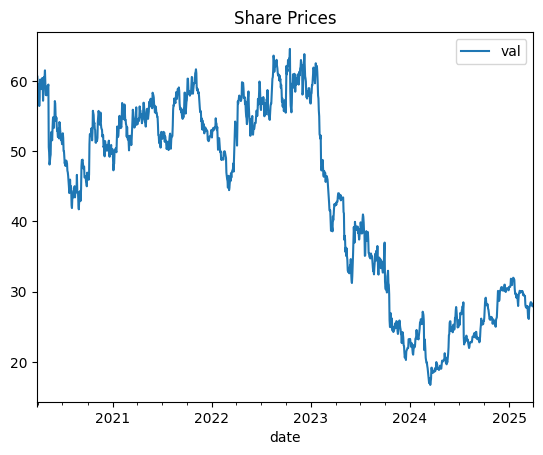

In [13]:
plot = share_prices_df.plot(title="Share Prices", x='date', y='val')